In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")

In [19]:
df.head()

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
0,14.0,16.0,6.0,96.0,42.0,2.0,196.0,2.0,5.0,2.0,...,2.0,2.0,7.0,0.0,4.0,84.0,1.0,2.0,548.0,208500.0
1,11.0,20.0,5.0,70.0,31.0,1.0,0.0,1.0,2.0,2.0,...,2.0,1.0,4.0,1.0,4.0,55.0,1.0,2.0,460.0,181500.0
2,14.0,16.0,6.0,99.0,53.0,2.0,162.0,2.0,5.0,2.0,...,2.0,2.0,4.0,1.0,4.0,89.0,1.0,2.0,608.0,223500.0
3,9.0,17.0,6.0,31.0,16.0,1.0,0.0,1.0,1.0,1.0,...,0.0,2.0,5.0,1.0,1.0,77.0,0.0,4.0,642.0,140000.0
4,14.0,24.0,7.0,87.0,38.0,2.0,350.0,2.0,5.0,2.0,...,2.0,2.0,8.0,1.0,4.0,76.0,1.0,4.0,836.0,250000.0


In [20]:
df.dtypes

MSSubClass      float64
Neighborhood    float64
OverallQual     float64
YearBuilt       float64
YearRemodAdd    float64
MasVnrType      float64
MasVnrArea      float64
ExterQual       float64
Foundation      float64
BsmtQual        float64
TotalBsmtSF     float64
HeatingQC       float64
1stFlrSF        float64
GrLivArea       float64
FullBath        float64
KitchenQual     float64
TotRmsAbvGrd    float64
Fireplaces      float64
GarageType      float64
GarageYrBlt     float64
GarageFinish    float64
GarageCars      float64
GarageArea      float64
SalePrice       float64
dtype: object

In [21]:
columns = df.columns

In [22]:
columns = np.array(columns)

In [23]:
columns

array(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'SalePrice'], dtype=object)

In [24]:
y_housing = pd.DataFrame(df["SalePrice"])

In [25]:
y_housing.head()

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [31]:
#とりあえず7個の特徴量を抽出
df_pickup = df.loc[:,["1stFlrSF",'GarageCars', 'GrLivArea','OverallQual', 'TotalBsmtSF','SalePrice']]
df_pickup.head()

,1stFlrSF,GarageCars,GrLivArea,OverallQual,TotalBsmtSF,SalePrice
0,856.0,2.0,1710.0,6.0,856.0,208500.0
1,1262.0,2.0,1262.0,5.0,1262.0,181500.0
2,920.0,2.0,1786.0,6.0,920.0,223500.0
3,961.0,4.0,1717.0,6.0,756.0,140000.0
4,1145.0,4.0,2198.0,7.0,1145.0,250000.0


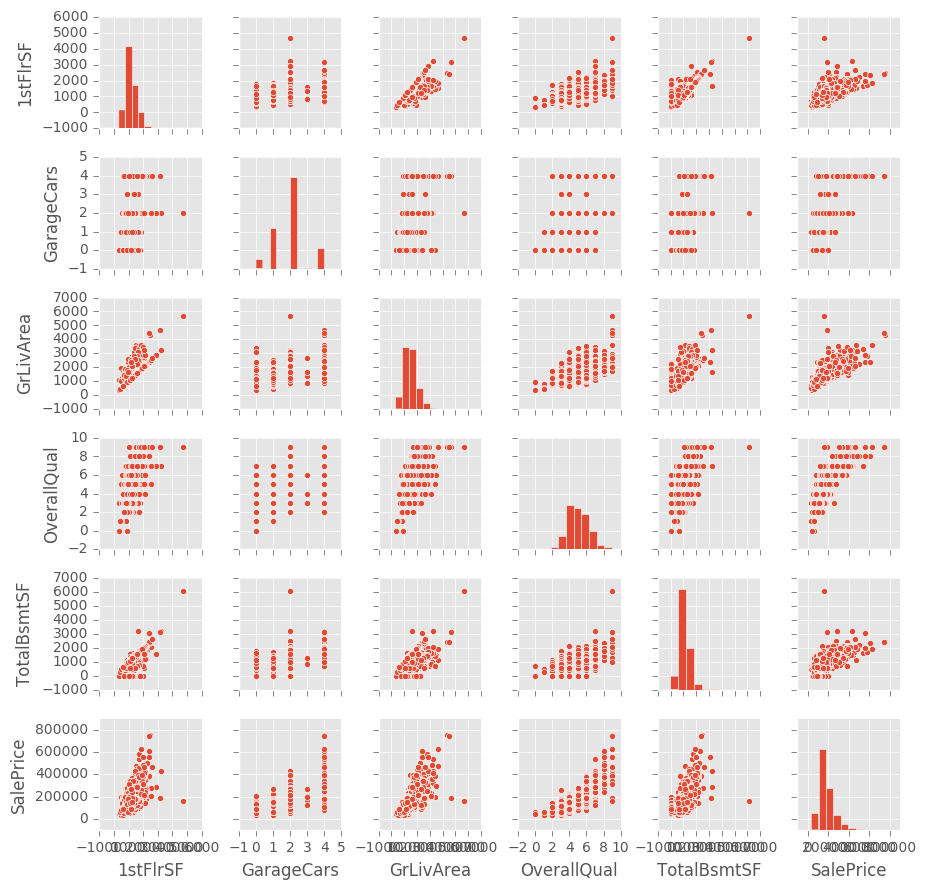

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df_pickup, size = 1.5)
plt.show()

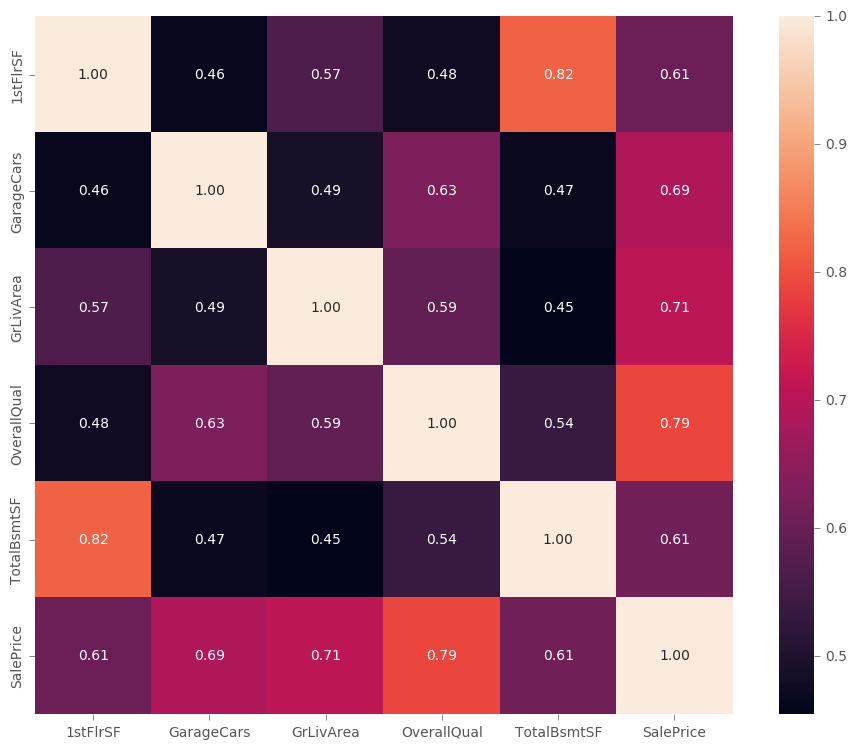

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize = (12,9))
sns.heatmap(df_pickup.corr(), annot =True, square = True, fmt=".2f")
plt.show()

In [37]:
# trainデータを用意
# DataFrameの.valuesメソッドでarrayに変換できます
X = df.loc[:, ['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea']].values
X

array([[  14.,   16.,    6., ...,    1.,    2.,  548.],
       [  11.,   20.,    5., ...,    1.,    2.,  460.],
       [  14.,   16.,    6., ...,    1.,    2.,  608.],
       ..., 
       [   9.,   17.,    6., ...,    1.,    1.,  252.],
       [  11.,   10.,    4., ...,    0.,    1.,  240.],
       [  11.,    4.,    4., ...,    2.,    1.,  276.]])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


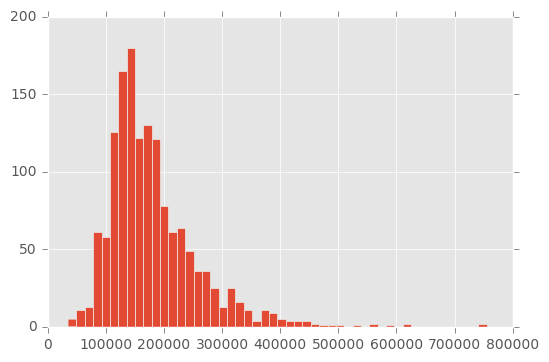

In [39]:
# testデータを用意
# DataFrameの.valuesメソッドでarrayに変換できます
y = df.loc[:, ['SalePrice']].values

# どのように入っているかヒストグラムで図示
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(y,bins=50)
ax.set_ylim(0,200)
fig.show()

In [40]:
# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
# データ全体のサンプル数を確認
print(X.shape)
print(y.shape)

(1460, 23)
(1460, 1)


In [42]:
# trainデータのサンプル数を確認
print(X_train.shape)
print(y_train.shape)

(1022, 23)
(1022, 1)


In [43]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [44]:
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
# 定数項を出力
lr.intercept_

array([-64685.79170598])

In [46]:
# 偏回帰係数を出力
# [LSTATの係数, RMの係数]
lr.coef_

array([[  3.33266101e+02,   1.72907758e+03,   8.71588990e+03,
         -5.74394723e+01,   1.44350854e+02,  -4.12478664e+03,
          3.40418773e+01,   7.90795412e+03,  -1.78572908e+03,
          1.25745168e+04,   2.74237056e+01,   1.07678865e+03,
          5.52326905e+00,   4.56570443e+01,  -5.90584040e+03,
          1.09974078e+04,   1.06197024e+03,   8.67046293e+03,
         -3.27680685e+01,   7.86200253e+01,   2.91883315e+03,
          6.40828939e+03,   1.29921921e+01]])

In [47]:
# 決定係数をtrainとtestに分けて出力
# 過学習しているかどうかを確認
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

R^2
train: 0.843
test : 0.761


In [48]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [49]:
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.843037
test : 0.759464


In [50]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** 1/2))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** 1/2))

RMSE
train: 477780049.283
test : 812760885.625


In [98]:
# 基本統計量をもう一度確認
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.004110,0.995890,0.999315,0.000685,180921.195890
std,386.587738,436.528436,29.317331,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.063996,0.063996,0.026171,0.026171,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,129975.000000
50%,1087.000000,0.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,163000.000000
75%,1391.250000,728.000000,0.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,214000.000000
max,4692.000000,2065.000000,508.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [52]:
#多項式回帰
#2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)    # 2次の多項式規定を生成